A Hands-on Workshop of Isolation Forest for Anomaly Detection and Data Preprocessing with Python


The Isolation Forest algorithm is a popular choice for anomaly detection because of several key advantages that make it well-suited for identifying anomalies in datasets. Isolation Forest is preferred for anomaly detection because it is efficient, scalable, works well with high-dimensional and large datasets, and doesn’t require labeled data or assumptions about data distribution. Its ability to handle imbalanced data and its interpretability make it a versatile and powerful tool for detecting anomalies in various domains, including cybersecurity, fraud detection, and system monitoring.

We will walk away with practical experience in setting up reproducible environments, processing real-world datasets, and applying anomaly detection models. We will understand the importance of proper data preprocessing, feature engineering, and effectively evaluating model results to draw actionable insights from data.

We start by setting up a Python environment with necessary packages like matplotlib, pandas, and scikit-learn.

In [ ]:
!pip install --upgrade pip
#create a virtual environment
#!pip install virtualenv

#Create a virtual environment:
#Open Command Prompt
#Navigate to your project directory
#Run the following commands:
# 
#!python3 -m venv myenv
#!source myenv/bin/activate
#!pip install seaborn
!pip install matplotlib
!pip install scikit-learn
#https://www.freecodecamp.org/news/python-requirementstxt-explained/
#!pip install -r requirements.txt

import pandas as pd
import sys

Data Loading and Cleaning:

    Load a CSV file into a pandas DataFrame.

    Handle missing data using dropna() and check for the presence of NaN values.

    Understand how to view unique values, column headers, and the number of rows in the dataset.

In [1]:
import pandas as pd
# Specify the file path
file_path = 'cleaned_benign_malicious_suspicious_service_installs_30days.csv'

# Read the CSV file into a pandas DataFrame
shuffled_df = pd.read_csv(file_path, low_memory=False)

# Display the DataFrame
display(shuffled_df)

,Timestamp,Event ID,ID,Account_Name,Service File Name,Service Name,Service Type,Service Start Type,Label
0,2024-08-04T17:58:19Z,7045.0,fc7deb2c-9f43-49de-aff0-e1d1080e871f,LocalSystem,C:\WINDOWS\sysmon.exe,sysmon,auto start,user mode service,benign
1,2024-08-04T17:58:26Z,7045.0,a91101ef-fe9a-4d65-b1d2-6479cee86eaf,LocalSystem,C:\WINDOWS\SysmonDrv.sys,SysmonDrv,boot start,kernel mode driver,benign
2,2024-08-04T18:00:18Z,7045.0,6bb5ea31-a7ba-4a3f-8ee6-694e57040b36,LocalSystem,C:\Windows\sysmon.exe,sysmon,auto start,user mode service,benign
3,2024-08-04T18:01:35Z,7045.0,1d62042f-5def-4338-8b51-eda4d6e0c2b9,LocalSystem,C:\Program Files (x86)\Microsoft Intune Manage...,Microsoft Intune Management Extension,auto start,user mode service,benign
4,2024-08-04T18:03:03Z,7045.0,6cdd1f43-8592-41bf-b3be-d9257c90ff9e,LocalSystem,C:\WINDOWS\sysmon.exe,sysmon,auto start,user mode service,benign
...,...,...,...,...,...,...,...,...,...
689339,2024-09-03T18:18:22Z,7045.0,e2897037-6042-4336-be2a-06464aa123f3,LocalSystem,C:\WINDOWS\sysmon.exe,sysmon,auto start,user mode service,benign
689340,2024-09-03T18:18:28Z,7045.0,837d494f-86b9-4a68-863b-33268450febb,LocalSystem,C:\WINDOWS\SysmonDrv.sys,SysmonDrv,boot start,kernel mode driver,benign
689341,2024-09-03T18:19:26Z,7045.0,f9a4d604-9a1b-4db5-ac35-ad33071df9d0,LocalSystem,C:\Windows\sysmon.exe,sysmon,auto start,user mode service,benign
689342,2024-09-03T18:19:28Z,7045.0,6639547f-83ec-4a85-9896-8bd5d84e41d1,LocalSystem,C:\Windows\sysmon.exe,sysmon,auto start,user mode service,benign


In [19]:
print(shuffled_df.columns)

Index(['Timestamp', 'Event ID', 'ID', 'Account_Name', 'Service File Name',
       'Service Name', 'Service Type', 'Service Start Type', 'Label'],
      dtype='object')


In [11]:
unique_values = shuffled_df['Label'].unique()
print(unique_values)

['benign' ' malicious' nan]


In [12]:
label_frequency =shuffled_df['Label'].isna().sum()
print(label_frequency)

2


In [2]:
#Remove any NaN values in the 'Label' column
#shuffled_df['Label'] = shuffled_df['Label'].dropna()
shuffled_df = shuffled_df.dropna()
unique_values2 = shuffled_df['Label'].unique()
print(unique_values2)
print( shuffled_df.shape)


['benign' ' malicious']
(689288, 9)


In [ ]:
#check number of row
print( shuffled_df.shape)

Class Distribution Analysis:

    Calculate and visualize the frequency distribution of classes (e.g., benign vs malicious) using matplotlib histograms.

    Plot histograms for columns like 'Service Name' and 'Event ID'.

Benign count: 688688
Malicious count: 600


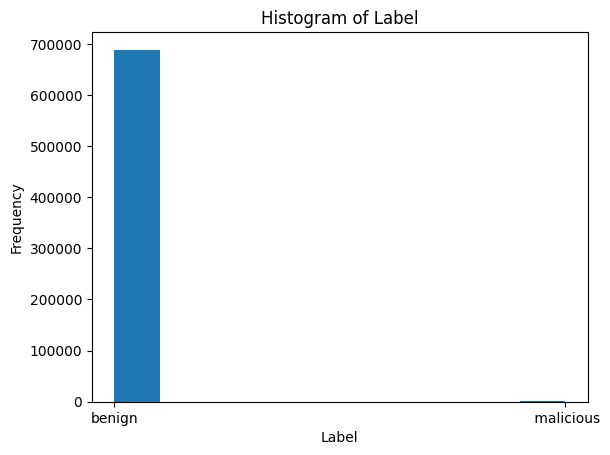

In [18]:
import matplotlib.pyplot as plt
# Check class distribution
class_distribution = shuffled_df['Label'].value_counts()
benign_count = class_distribution['benign']  # Adjust with your actual label for the benign class
malicious_count = class_distribution[' malicious']  # Adjust with your actual label for the malicious class

print(f"Benign count: {benign_count}")
print(f"Malicious count: {malicious_count}")

# Plot the histogram
plt.hist(shuffled_df['Label'].astype(str))  # Convert labels to strings if needed

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Histogram of Label')

# Show the plot
plt.show()

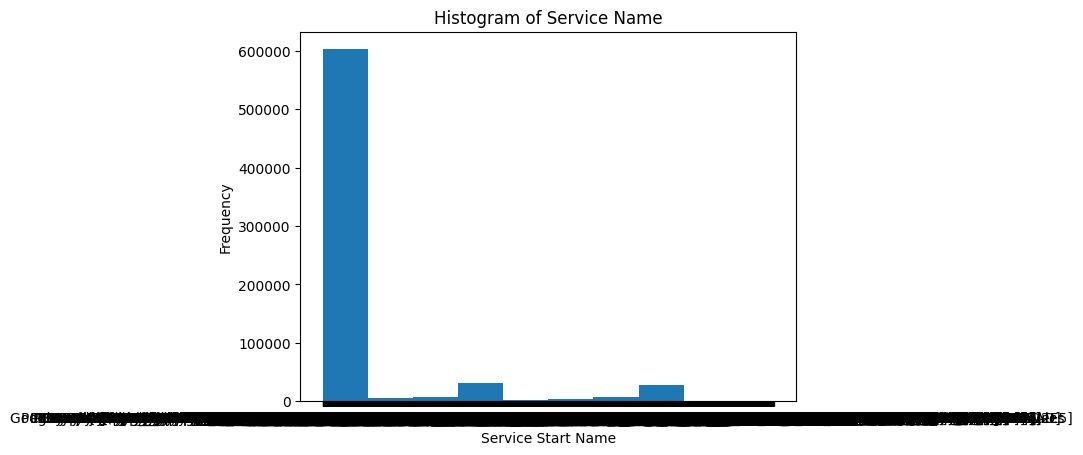

In [21]:

# Plot the histogram
plt.hist(shuffled_df['Service Name'].astype(str))  # Convert labels to strings if needed

# Add labels and title
plt.xlabel('Service Start Name')
plt.ylabel('Frequency')
plt.title('Histogram of Service Name')

# Show the plot
plt.show()

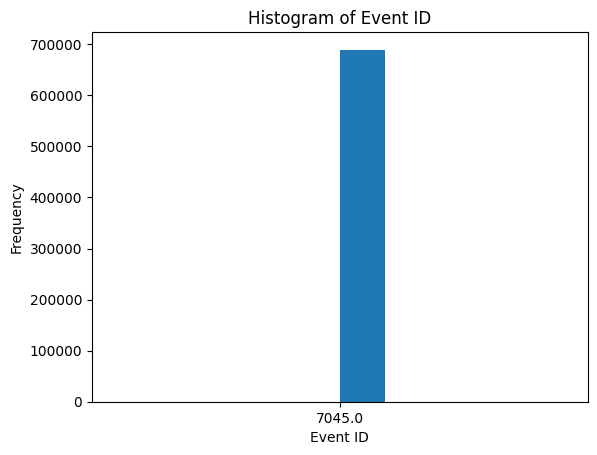

In [25]:
# Plot the histogram
plt.hist(shuffled_df['Event ID'].astype(str))  # Convert labels to strings if needed

# Add labels and title
plt.xlabel('Event ID')
plt.ylabel('Frequency')
plt.title('Histogram of Event ID')

# Show the plot
plt.show()

Frequency Analysis:

    Perform frequency analysis on specific columns and display the top 3 most frequent values in each.

In [34]:
# List of columns to run frequency analysis
columns_to_analyze = ['Timestamp', 'Event ID', 'ID', 'Account Name', 'Service File Name',
       'Service Name', 'Service Type', 'Service Start Type', 'Label']

# Dictionary to store frequency counts
frequency_counts = {}

# Calculate frequency for each column
for column in columns_to_analyze:
    frequency_counts[column] = shuffled_df[column].value_counts().head(3)

# Display the frequency counts
for column, counts in frequency_counts.items():
    print(f"\nTop 3 frequencies for column '{column}':")
    print(counts)


Top 3 frequencies for column 'Timestamp':
Timestamp
2024-08-07T19:43:13Z    33
2024-08-07T16:36:15Z    31
2024-08-30T23:43:00Z    30
Name: count, dtype: int64

Top 3 frequencies for column 'Event ID':
Event ID
7045.0    689288
Name: count, dtype: int64

Top 3 frequencies for column 'ID':
ID
1a1f754a-ac85-4e7d-86b4-1013abea571e    13
cdc70203-499e-469d-87a7-35be4dca7826    10
c18efd8a-8a2c-47af-940d-7c6b09cb8a86     7
Name: count, dtype: int64

Top 3 frequencies for column 'Account Name':
Account Name
LocalSystem                  686799
NT AUTHORITY\LocalService      1033
.\localsystem                   436
Name: count, dtype: int64

Top 3 frequencies for column 'Service File Name':
Service File Name
C:\WINDOWS\sysmon.exe       150301
C:\WINDOWS\SysmonDrv.sys    145246
C:\Windows\sysmon.exe       123120
Name: count, dtype: int64

Top 3 frequencies for column 'Service Name':
Service Name
sysmon                                                                                   327494
Sysm

We don't upsample malicious activities for unsupervised learning.

Handling Imbalanced Data:
    Use RandomOverSampler from imblearn to balance imbalanced datasets (e.g., making sure the benign and malicious labels have desired proportions).

In [ ]:
#!pip install imblearn
#from imblearn.over_sampling import RandomOverSampler

# Example DataFrame with labels 'malicious' and 'benign'
# Make sure you replace it with your actual data
# Assuming 'Label' column has 'malicious' and 'benign' values
#X = shuffled_df.drop(columns='Label')  # Features
#y = shuffled_df['Label']  # Target labels ('malicious' and 'benign')

# Set the sampling strategy for 20% malicious and 80% benign
#sampling_strategy = {' malicious': int(0.25 * y.value_counts()['benign']), 'benign': y.value_counts()['benign']}

# Initialize RandomOverSampler with the custom strategy
#ros = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)

# Resample the dataset
#X_resampled, y_resampled = ros.fit_resample(X, y)

# Combine the resampled features and labels into a new DataFrame
#shuffled_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Label')], axis=1)

# Check the new class distribution
#print(shuffled_df['Label'].value_counts())



In [29]:
# Get summary statistics of the numerical columns
print(shuffled_df.describe())
# Check for missing values
print(shuffled_df.isna().sum())

       Event ID
count  689288.0
mean     7045.0
std         0.0
min      7045.0
25%      7045.0
50%      7045.0
75%      7045.0
max      7045.0
Timestamp             0
Event ID              0
ID                    0
Account_Name          0
Service File Name     0
Service Name          0
Service Type          0
Service Start Type    0
Label                 0
dtype: int64


In [3]:
shuffled_df.columns = shuffled_df.columns.str.replace('_', ' ')
print(shuffled_df.columns)

Index(['Timestamp', 'Event ID', 'ID', 'Account Name', 'Service File Name',
       'Service Name', 'Service Type', 'Service Start Type', 'Label'],
      dtype='object')


Isolation Forest is an unsupervised machine learning algorithm for anomaly detection. This algorithm leverages an ensemble of decision trees, much like a random forest, to make its predictions. By averaging the results from multiple trees, Isolation Forest assigns a robust anomaly score to each data point, ensuring a more reliable detection of outliers.

Source: F. T. Liu, K. M. Ting and Z. -H. Zhou, "Isolation Forest," 2008 Eighth IEEE International Conference on Data Mining, Pisa, Italy, 2008, pp. 413-422, doi: 10.1109/ICDM.2008.17. keywords: {Application software;Credit cards;Detectors;Constraint optimization;Data mining;Information technology;Laboratories;Isolation technology;Performance evaluation;Astronomy;anomaly detection;outlier detection;novelty detection;isolation forest;binary trees;model based},
URL: https://ieeexplore.ieee.org/document/4781136

In [4]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest




Data Preprocessing & Feature extractions:

    Perform feature engineering by extracting date and time components (year, month, day, hour) from timestamps.
    
    Encode categorical variables using OneHotEncoder and concatenate them back into the main DataFrame.

In [5]:
# datetime conversion
shuffled_df['Timestamp'] = pd.to_datetime(shuffled_df['Timestamp'], errors='coerce')

# Feature Engineering: Extract date components from the Timestamp
# Extract year, month, day, and hour from the Timestamp
shuffled_df['year'] = shuffled_df['Timestamp'].dt.year 
shuffled_df['year'] = shuffled_df['Timestamp'].dt.year
shuffled_df['month'] = shuffled_df['Timestamp'].dt.month
shuffled_df['day'] = shuffled_df['Timestamp'].dt.day
shuffled_df['day_of_week'] = shuffled_df['Timestamp'].dt.day_name()
shuffled_df['hour'] = shuffled_df['Timestamp'].dt.hour

# Drop the 'Timestamp' column
shuffled_df.drop(columns=['Timestamp'], inplace=True)
shuffled_df = shuffled_df.dropna()

Model Training and Anomaly Detection:

Train an Isolation Forest model for anomaly detection.

Split the dataset into training and testing sets.

Use the Isolation Forest model to predict anomalies based on various features.

Display predictions, scores, and associate them with unique identifiers (ID).

In [6]:
# Identify categorical columns to encode (excluding 'ID')
categorical_columns = ['Account Name', 'Service File Name', 'Service Name', 'Service Type', 'Service Start Type', 'hour', 'day_of_week']

# Initialize OneHotEncoder and encode categorical columns
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_df = pd.DataFrame(encoder.fit_transform(shuffled_df[categorical_columns]),
                          columns=encoder.get_feature_names_out(categorical_columns))

#  Concatenate the encoded columns back to the original DataFrame
shuffled_df = pd.concat([shuffled_df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Step 8: Drop the original categorical columns
shuffled_df.drop(columns=categorical_columns, inplace=True)

# Step 9: Ensure the 'ID' column exists
# If you don't have an 'ID' column in your dataset, remove this part
id_column = shuffled_df['ID'] if 'ID' in shuffled_df.columns else pd.Series(range(len(shuffled_df)))

# Step 10: Extract features for the model (excluding 'Label' and 'ID')
features = shuffled_df.drop(columns=['Label', 'ID'] if 'ID' in shuffled_df.columns else ['Label'])
labels = shuffled_df['Label']

# Step 11: Split the data into training and testing sets
X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(features, labels, id_column, test_size=0.3, random_state=42)

# Step 12: Initialize and fit the Isolation Forest model on the training data
model = IsolationForest(n_estimators=100, contamination='auto', random_state=50)
X_train_cleaned = X_train.dropna()
model.fit(X_train)

# Step 13: Predict on the testing set
test_scores = model.decision_function(X_test)
test_predictions = model.predict(X_test)

# Step 14: Combine predictions with the 'ID' column for identification
results_df = pd.DataFrame({
    'ID': id_test,
    'Test Scores': test_scores,
    'Test Predictions': test_predictions
})

Model evaluation # 1

Result Analysis:

Evaluate the predictions by comparing them with expert-labeled data (benign vs malicious).

Use cross-tabulation to compare the expert opinions with model results.

Relabel anomaly predictions for better interpretation (e.g., 1 as "not an anomaly" and 0 as "an anomaly").

Display and analyze the frequency of these predictions.

In [7]:
# Create a DataFrame for the results
shuffled_df_test = shuffled_df.iloc[X_test.index].copy()

# Add the label, scores, and predictions back to the testing set for analysis
shuffled_df_test['Label'] = y_test
shuffled_df_test['Scores'] = test_scores
shuffled_df_test['Anomaly'] = test_predictions

# Display results
if 'ID' in shuffled_df_test.columns:
    print(shuffled_df_test[['ID', 'Label', 'Scores', 'Anomaly']])
else:
    print("Warning: '0: Indicates an anomaly & 1: Indicates that the point is not an anomaly.")
    print(shuffled_df_test[['Label', 'Scores', 'Anomaly']])


                                          ID   Label    Scores  Anomaly
93268   f69638f5-08a1-4fe5-b31b-a322ab874d8a  benign  0.169191        1
415865  af914061-225b-45c0-b3ed-c6d9f1d2a80b  benign  0.136105        1
503149  ac528e8e-76e6-4590-a41a-77fecc2706ea  benign  0.152184        1
215501  f20109ac-d7d2-43ca-943b-3bb835b7502d  benign  0.164312        1
664145  3355a030-9e9e-49c9-a652-adecbdc7f811  benign  0.139457        1
...                                      ...     ...       ...      ...
411876  de3da1f0-5821-49bd-85e7-7e44fb523c83  benign  0.140691        1
71441   dadfec06-d643-4e52-974d-8f6c62a6cb55  benign  0.152947        1
109644  fcd06ba4-c519-4956-aaca-c287f188ae9d  benign  0.143127        1
284425  321b7055-3cf5-47fb-a0ee-866efa50b1fa  benign  0.171291        1
374242  2fc0b52f-9df6-43dd-9721-13931c50434d  benign  0.154766        1

[206787 rows x 4 columns]


Model evaluation # 2

In [8]:
# Display frequency for 'Label' and 'Anomaly'
print("Frequency of Expert Opinion or Label ( 'benign' vs 'malicious'):")
print(shuffled_df_test['Label'].value_counts() )


Frequency of Expert Opinion or Label ( 'benign' vs 'malicious'):
Label
benign        206594
 malicious       193
Name: count, dtype: int64


Model evaluation # 3

In [9]:

# Relabel the 'Anomaly' column: 1 -> "not an anomaly", 0 -> "an anomaly"
shuffled_df_test['Anomaly'] = shuffled_df_test['Anomaly'].replace({1: "not an anomaly", 0: "an anomaly"})

# Print the frequency to check the new labels
print("Frequency of Model Result ('not an anomaly' vs 'an anomaly'):")
print(shuffled_df_test['Anomaly'].value_counts())

Frequency of Model Result ('not an anomaly' vs 'an anomaly'):
Anomaly
not an anomaly    206787
Name: count, dtype: int64



This program is designed to provide a comprehensive workflow for processing, visualizing, and detecting anomalies in data, using real-world Machine Learning techniques and tools in Python.

Data Handling: pandas for data manipulation, cleaning, and analysis.

Data Visualization: matplotlib for plotting histograms and visualizing distributions.

x Imbalanced Data Handling: Random oversampling with imblearn.

Anomaly Detection: Using IsolationForest from scikit-learn.

Feature Engineering: Extracting date components and encoding categorical variables.

Model Evaluation: Cross-tabulation and frequency analysis for comparing model results with actual labels.